## Exercise 10: Mapping, Twitter Style

For this exercise, I actually found TAGS to work more efficiently than the Twitter API. I wasn't sure why, but it did refuse to work a few times. Additionally, the initial step utilizing Geopy took forever.

In [1]:
import pandas as pd
df = pd.read_csv('ethereum.csv')
print(df.dtypes)

id_str                         int64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates              float64
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str               int64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


In [2]:
tdf = df[['from_user', 'user_location', 'text']]
print(tdf)

            from_user                  user_location  \
0         Edthaapollo                         Russia   
1     pinotribecrypto                            NaN   
2        drazendombaj  Born on Mars and fall to Moon   
3          CRYPT0_REM                            NaN   
4             hiozers                  Paris, France   
...               ...                            ...   
2917        AlyHagane                 Hell adjacent    
2918          gosnado                            NaN   
2919       teddiesage       Baldt, Republic of Baldt   
2920     GordonPaille                            NaN   
2921     GordonPaille                            NaN   

                                                   text  
0     My new 3d artwork. Is it worth spreading on NF...  
1     ⚡️⚡️PinoTribeCrypto⚡️⚡️\n#007 1/1 editions\n🚀0...  
2     RT @cryptoMaxi420: Daily reminder that #Polygo...  
3     a variation \n\n#nfts #nft #nftart #nftartist ...  
4          @LevelUpCrypto_ #Ethereum 

In [3]:
locs = tdf['user_location'].value_counts()
print(locs)

Düsseldorf, Deutschland       50
Bermuda Triangle              34
İstanbul, Türkiye             29
Paris, France                 22
Metaverse                     17
                              ..
Paris                          1
Semoga jadi akun wangi         1
Chester-le-Street, England     1
Asaba, Nigeria                 1
Hell adjacent                  1
Name: user_location, Length: 648, dtype: int64


In [8]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=.2)

def find_location(row):
    place = row['user_location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

RateLimiter caught an error, retrying (0/2 tries). Called with (*('New York City and Scottsdale',), **{}).
Traceback (most recent call last):
  File "C:\Users\inani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\inani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 1348, in getresponse
    response.begin()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 316, in begin
    version, status, reason = self._read_status()
  File "C:\Users\inani\anaconda3\lib\http\client.py", line 277, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\inani\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\inani\anaconda3\lib\ssl.py", line 1241, in recv

,from_user,user_location,text,latitude,longitude
0,Edthaapollo,Russia,My new 3d artwork. Is it worth spreading on NF...,64.686314,97.745306
1,pinotribecrypto,NaN,⚡️⚡️PinoTribeCrypto⚡️⚡️\n#007 1/1 editions\n🚀0...,46.314475,11.048029
2,drazendombaj,Born on Mars and fall to Moon,RT @cryptoMaxi420: Daily reminder that #Polygo...,Not Found,Not Found
3,CRYPT0_REM,NaN,a variation \n\n#nfts #nft #nftart #nftartist ...,46.314475,11.048029
4,hiozers,"Paris, France",@LevelUpCrypto_ #Ethereum @Goobi18 @Ethertot,48.85889,2.320041
...,...,...,...,...,...
2917,AlyHagane,Hell adjacent,RT @UzuriMia: A friendly fucking reminder that...,47.261135,8.48291
2918,gosnado,NaN,@PauloGaspar2 @SebbieAfterDark @GloriousArcadu...,46.314475,11.048029
2919,teddiesage,"Baldt, Republic of Baldt",@ArcadumFan @heychrisfox @pepesech1 Says the d...,Not Found,Not Found
2920,GordonPaille,NaN,@heychrisfox @pepesech1 Not as embarrassing as...,46.314475,11.048029


In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

In [10]:
tdf = tdf[tdf['latitude'] != 'Not Found']
tdf = tdf[tdf['longitude'] != 'Not Found']

lats = tdf['latitude']
longs = tdf['longitude']

print(lats)
print(longs)

0       64.686314
1       46.314475
3       46.314475
4        48.85889
5       46.314475
          ...    
2916    46.314475
2917    47.261135
2918    46.314475
2920    46.314475
2921    46.314475
Name: latitude, Length: 2714, dtype: object
0       97.745306
1       11.048029
3       11.048029
4        2.320041
5       11.048029
          ...    
2916    11.048029
2917      8.48291
2918    11.048029
2920    11.048029
2921    11.048029
Name: longitude, Length: 2714, dtype: object


In [11]:
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

0       64.686314
1       46.314475
2       46.314475
3        48.85889
4       46.314475
          ...    
2709    46.314475
2710    47.261135
2711    46.314475
2712    46.314475
2713    46.314475
Name: latitude, Length: 2714, dtype: object


In [14]:
conda install -c conda-forge cartopy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\inani\anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    cartopy-0.18.0             |   py38ha8b43f1_1         1.7 MB
    certifi-2021.10.8          |   py38haa244fe_1         145 KB  conda-forge
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    geos-3.8.0                 |       h33f27b4_0         905 KB
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    proj-7.0.1                 |       hf5a9257_1         2.0 MB
    pyshp-2.1.3                |     pyh44b312d_0          36 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    shapely-1.7.1              |   py38h0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\inani\anaconda3\python.exe' 'C:\Users\inani\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\inani\AppData\Local\Temp\tmp3svp9tlq'
       cwd: C:\Users\inani\AppData\Local\Temp\pip-install-ktbf87bu\cartopy_e19406214fc4447b95100b58f3d09cf4
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\inani\anaconda3\python.exe' 'C:\Users\inani\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\inani\AppData\Local\Temp\tmpfyk415a9'
       cwd: C:\Users\inani\AppData\Local\Temp\pip-install-ktbf87bu\cartopy_9c48e9f059794fd99feacf73e5939b09
  Complete output (3

  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.20.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)
  Using cached Cartopy-0.17.0.tar.gz (8.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getti

C:\Users\inani\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


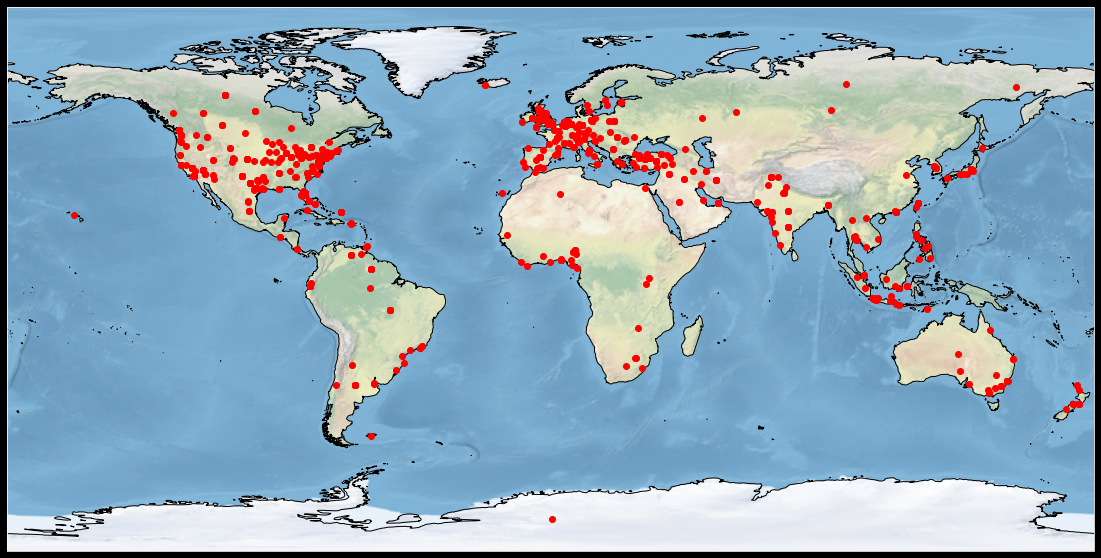

In [15]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

In [16]:
counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

      latitude   longitude  count
0   -79.406307    0.314931      1
1   -51.921795  -59.650149      1
2   -42.994567  170.710041      1
3   -41.500083  172.834408      2
4   -41.289636  174.775772      3
..         ...         ...    ...
392  58.595904   23.219646     10
393  61.066692 -107.991707     14
394  63.551503  154.014726      1
395  64.145981  -21.942237      1
396  64.686314   97.745306      1

[397 rows x 3 columns]


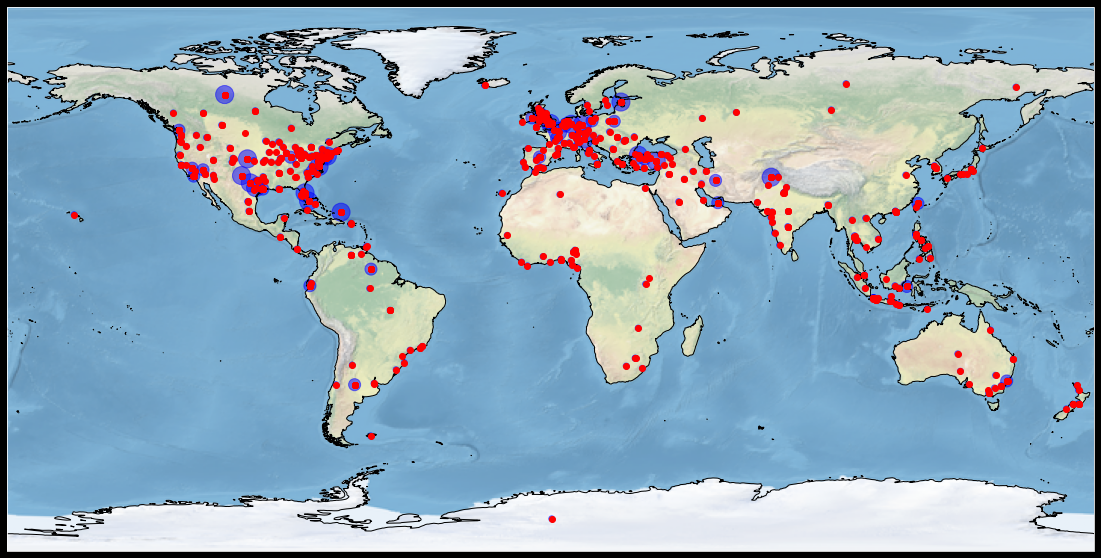

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
                                                                                                     
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                                                         
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3

colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()